In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (handling encoding issue)
df = pd.read_csv("Global YouTube Statistics.csv", encoding="latin1")

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Remove duplicate channels
df = df.drop_duplicates(subset=["youtuber"])

# Convert date column
df["created_date"] = pd.to_datetime(df["created_date"], errors="coerce")


In [2]:
df

,rank,youtuber,subscribers,video_views,category,title,uploads,country_of_origin,country,abbreviation,...,subscribers_for_last_30_days,created_year,created_month,created_date,gross_tertiary_education_enrollment_(%),population,unemployment_rate,urban_population,latitude,longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,India,india,IN,...,2000000.0,2006.0,Mar,1970-01-01 00:00:00.000000013,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000.0,0.000000e+00,Film & Animation,youtubemovies,1,United States,United States,US,...,NaN,2006.0,NaN,1970-01-01 00:00:00.000000005,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,United States,US,...,8000000.0,2012.0,Feb,1970-01-01 00:00:00.000000020,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,United States,US,...,1000000.0,2006.0,Sep,1970-01-01 00:00:00.000000001,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,India,IN,...,1000000.0,2006.0,Sep,1970-01-01 00:00:00.000000020,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000.0,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,Brazil,BR,...,700000.0,2017.0,Feb,1970-01-01 00:00:00.000000012,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000.0,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,India,IN,...,300000.0,2018.0,Sep,1970-01-01 00:00:00.000000014,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000.0,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,United Kingdom,GB,...,1000.0,2006.0,Sep,1970-01-01 00:00:00.000000011,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000.0,3.741235e+08,Gaming,RobTopGames,39,Sweden,Sweden,SE,...,100000.0,2012.0,May,1970-01-01 00:00:00.000000009,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


1.	What are the top 10 YouTube channels based on the number of subscribers?

In [3]:
top_10_channels = df.sort_values("subscribers", ascending=False)[
    ["youtuber", "subscribers"]
].head(10)

top_10_channels


,youtuber,subscribers
0,T-Series,245000000.0
1,YouTube Movies,170000000.0
2,MrBeast,166000000.0
3,Cocomelon - Nursery Rhymes,162000000.0
4,SET India,159000000.0
5,Music,119000000.0
6,ýýý Kids Diana Show,112000000.0
7,PewDiePie,111000000.0
8,Like Nastya,106000000.0
9,Vlad and Niki,98900000.0


2.	Which category has the highest average number of subscribers?

In [4]:
avg_subscribers_category = (
    df.groupby("category")["subscribers"]
    .mean()
    .sort_values(ascending=False)
)

avg_subscribers_category.head()


,subscribers
category,
Shows,4.161538e+07
Trailers,3.900000e+07
Nonprofits & Activism,2.775000e+07
Film & Animation,2.762727e+07
Sports,2.710909e+07


3.How many videos, on average, are uploaded by YouTube channels in each category?

In [5]:
avg_uploads_category = df.groupby("category")["uploads"].mean()

avg_uploads_category


,uploads
category,
Autos & Vehicles,1898.500000
Comedy,1119.753623
Education,3142.866667
Entertainment,12052.445378
Film & Animation,2861.844444
Gaming,4313.414894
Howto & Style,1700.794872
Movies,3553.000000
Music,2347.129353


4.	What are the top 5 countries with the highest number of YouTube channels?

In [6]:
top_5_countries = df["country"].value_counts().head(5)

top_5_countries


,count
country,
United States,313
India,167
Brazil,62
United Kingdom,43
Mexico,33


5.	What is the distribution of channel types across different categories?

In [7]:
channel_distribution = pd.crosstab(df["category"], df["channel_type"])

channel_distribution


channel_type,Animals,Autos,Comedy,Education,Entertainment,Film,Games,Howto,Music,News,Nonprofit,People,Sports,Tech
category,,,,,,,,,,,,,,
Autos & Vehicles,0,1,0,0,1,0,0,0,0,0,0,0,0,0
Comedy,0,0,38,0,20,1,3,0,0,0,0,5,0,0
Education,0,0,0,35,3,2,2,0,0,0,0,3,0,0
Entertainment,0,1,5,2,168,6,11,0,22,3,0,11,0,1
Film & Animation,0,0,1,2,16,17,3,0,3,0,0,2,0,0
Gaming,0,1,1,0,18,2,63,0,0,0,0,6,0,1
Howto & Style,0,0,0,0,7,0,0,26,0,0,0,2,0,1
Movies,0,0,0,0,0,2,0,0,0,0,0,0,0,0
Music,0,0,0,1,12,5,2,0,174,1,0,2,1,0


6.	Is there a correlation between the number of subscribers and total video views for YouTube channels?

In [8]:
correlation = df["subscribers"].corr(df["video_views"])
correlation


np.float64(0.7508939913768762)

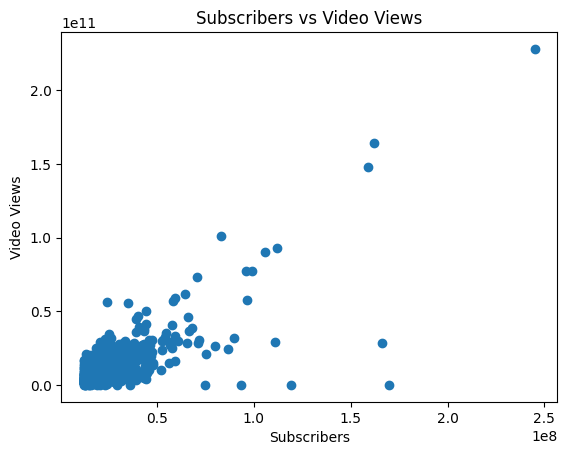

In [9]:
plt.scatter(df["subscribers"], df["video_views"])
plt.xlabel("Subscribers")
plt.ylabel("Video Views")
plt.title("Subscribers vs Video Views")
plt.show()


There is a positive Correlation bet x and y and there is 1 outlier

7.	How do the monthly earnings vary throughout different categories?

In [10]:
df["avg_monthly_earnings"] = (
    df["lowest_monthly_earnings"] + df["highest_monthly_earnings"]
) / 2

earnings_by_category = df.groupby("category")["avg_monthly_earnings"].mean()

earnings_by_category


,avg_monthly_earnings
category,
Autos & Vehicles,5.773250e+05
Comedy,3.550899e+05
Education,3.692745e+05
Entertainment,3.343743e+05
Film & Animation,3.978933e+05
Gaming,1.444317e+05
Howto & Style,1.022994e+05
Movies,2.415500e+05
Music,2.949059e+05


8.	What is the overall trend in subscribers gained in the last 30 days across all channels?

In [11]:
total_new_subs = df["subscribers_for_last_30_days"].sum()
total_new_subs

np.float64(229694069.0)

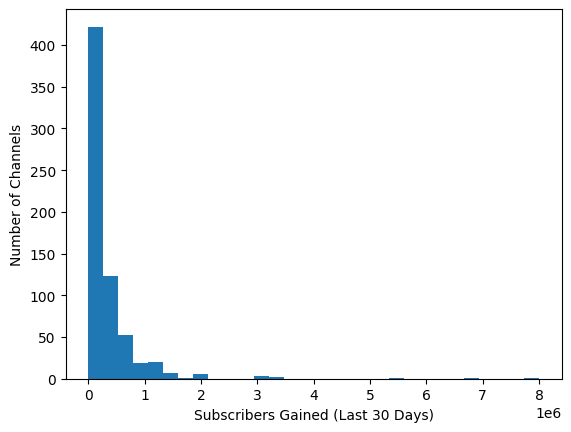

In [12]:
plt.hist(df["subscribers_for_last_30_days"], bins=30)
plt.xlabel("Subscribers Gained (Last 30 Days)")
plt.ylabel("Number of Channels")
plt.show()

9.	Are there any outliers in terms of yearly earnings from YouTube channels ?

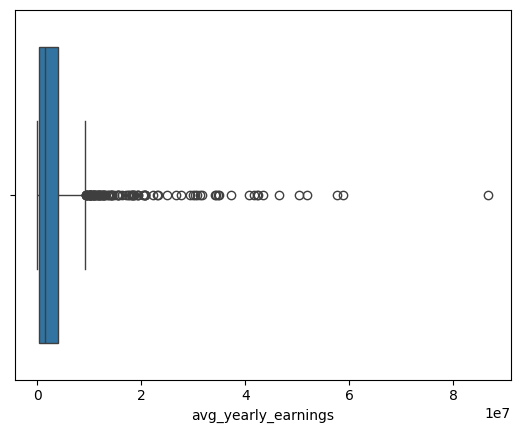

In [13]:
df["avg_yearly_earnings"] = (
    df["lowest_yearly_earnings"] + df["highest_yearly_earnings"]
) / 2

sns.boxplot(x=df["avg_yearly_earnings"])
plt.show()

there is 1 outlier

10.	What is the distribution of channel creation dates? Is there any trend over time?


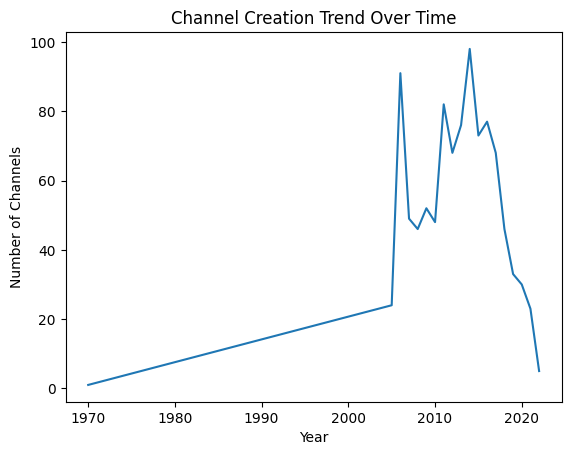

In [14]:
df["created_year"].value_counts().sort_index().plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Number of Channels")
plt.title("Channel Creation Trend Over Time")
plt.show()


11.	Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

In [15]:
channels_by_country = df.groupby("country").size()

education_corr = channels_by_country.corr(
    df.groupby("country")["gross_tertiary_education_enrollment_(%)"].mean()
)

education_corr

np.float64(0.11241649016296935)

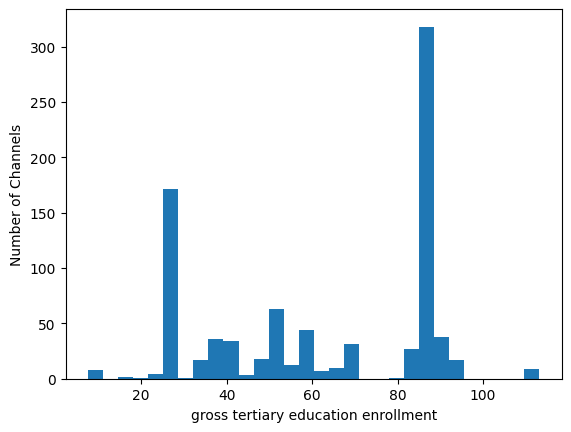

In [18]:
plt.hist(df["gross_tertiary_education_enrollment_(%)"], bins=30)
plt.xlabel("gross tertiary education enrollment")
plt.ylabel("Number of Channels")
plt.show()

12.	How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?

In [19]:
top_10_country_channels = df["country"].value_counts().head(10).index

df[df["country"].isin(top_10_country_channels)][
    ["country", "unemployment_rate"]
].drop_duplicates()


,country,unemployment_rate
1,United States,14.70
4,India,5.36
8,Russia,4.59
13,South Korea,4.15
16,United Kingdom,3.85
23,Brazil,12.08
61,Thailand,0.75
71,Mexico,3.42
81,Spain,13.96
117,Indonesia,4.69


13.	What is the average urban population percentage in countries with YouTube channels?

In [20]:
avg_urban_population = df["urban_population"].mean()
avg_urban_population


np.float64(224214981.63188073)

14.	Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?

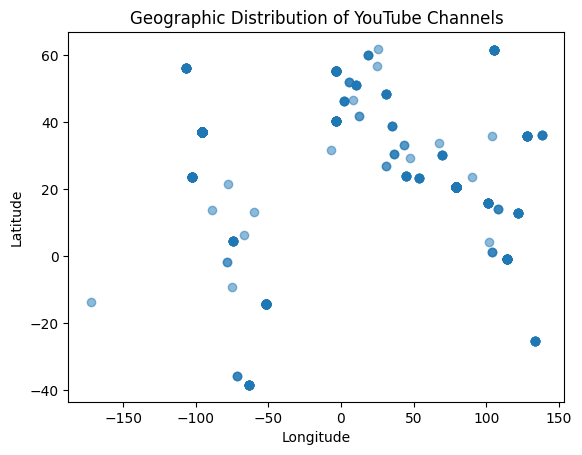

In [21]:
plt.scatter(df["longitude"], df["latitude"], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of YouTube Channels")
plt.show()

15.	What is the correlation between the number of subscribers and the population of a country?

In [22]:
population_corr = df["subscribers"].corr(df["population"])
population_corr


np.float64(0.0827460859806212)

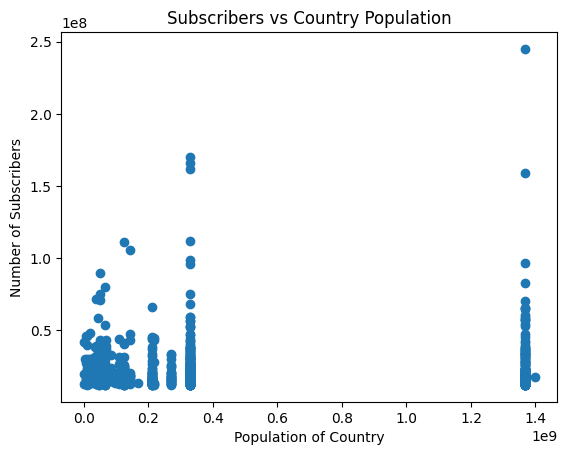

In [23]:
plt.figure()
plt.scatter(df["population"], df["subscribers"])
plt.xlabel("Population of Country")
plt.ylabel("Number of Subscribers")
plt.title("Subscribers vs Country Population")
plt.show()

16.	How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?

In [24]:
df.groupby("country")["population"].mean().loc[top_10_country_channels]


,population
country,
United States,3.282395e+08
India,1.366418e+09
Brazil,2.125594e+08
United Kingdom,6.683440e+07
Mexico,1.260140e+08
Indonesia,2.702039e+08
Spain,4.707678e+07
Thailand,6.962558e+07
South Korea,5.170910e+07


17.	Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?

In [25]:
df["subscribers_for_last_30_days"].corr(df["unemployment_rate"])


np.float64(-0.021130060748541613)

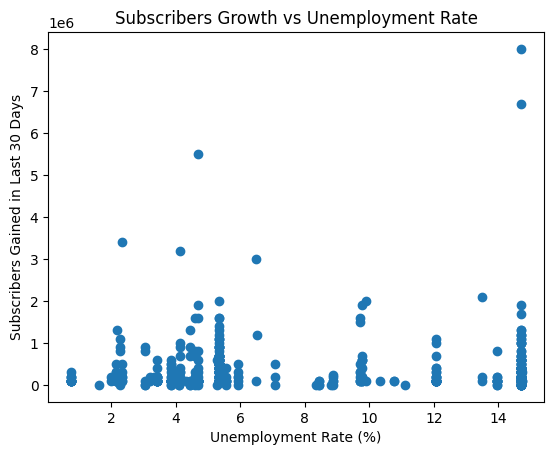

In [26]:
plt.figure()
plt.scatter(df["unemployment_rate"], df["subscribers_for_last_30_days"])
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Subscribers Gained in Last 30 Days")
plt.title("Subscribers Growth vs Unemployment Rate")
plt.show()


18.	How does the distribution of video views for the last 30 days vary across different channel types?

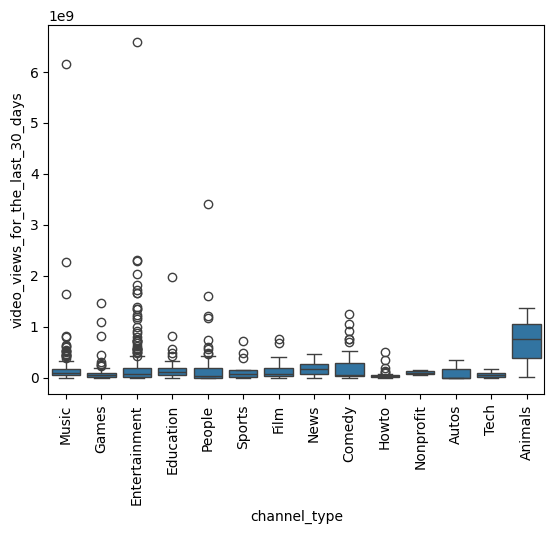

In [27]:
sns.boxplot(x="channel_type", y="video_views_for_the_last_30_days", data=df)
plt.xticks(rotation=90)
plt.show()

19.	Are there any seasonal trends in the number of videos uploaded by YouTube channels?

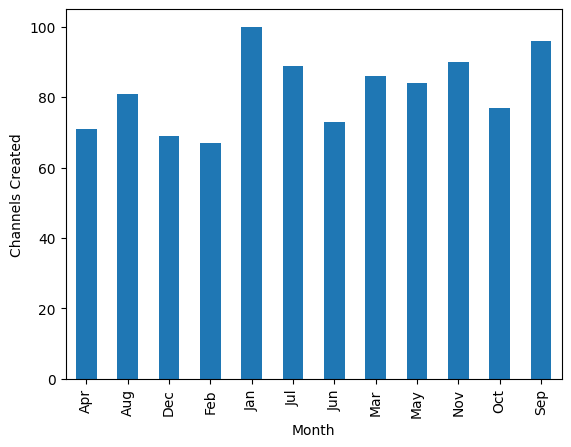

In [28]:
df["created_month"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Channels Created")
plt.show()

20.	What is the average number of subscribers gained per month since the creation of YouTube channels till now?

In [30]:
current_year = pd.Timestamp.now().year
df["channel_age_months"] = (current_year - df["created_year"]) * 12

df["avg_monthly_subscriber_growth"] = (
    df["subscribers"] / df["channel_age_months"]
)

df[["youtuber", "avg_monthly_subscriber_growth"]].head()


,youtuber,avg_monthly_subscriber_growth
0,T-Series,1.020833e+06
1,YouTube Movies,7.083333e+05
2,MrBeast,9.880952e+05
3,Cocomelon - Nursery Rhymes,6.750000e+05
4,SET India,6.625000e+05


from matplotlib import pyplot as plt
_df_10['avg_monthly_subscriber_growth'].plot(kind='hist', bins=20, title='avg_monthly_subscriber_growth')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('youtuber').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['avg_monthly_subscriber_growth'].plot(kind='line', figsize=(8, 4), title='avg_monthly_subscriber_growth')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['youtuber'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='avg_monthly_subscriber_growth', y='youtuber', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)